<a href="https://colab.research.google.com/github/HendersonSousa20/Analise-de-base-de-vendas/blob/main/Analise_de_base_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações e Configuração de Ambiente


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging


sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


 # Função de Carregamento e Pré-processamento

In [26]:
def carregar_dados(caminho: str) -> pd.DataFrame:
    """Carrega e trata os dados da base de vendas."""
    try:
        df = pd.read_excel('/content/Cópia de Base de Vendas Varejo.xlsx')
        df['Data da Venda'] = pd.to_datetime(df['Data da Venda'], errors='coerce')
        df['Receita'] = df['Valor da Venda'] - df['Custo de Envio']
        df['AnoMes'] = df['Data da Venda'].dt.to_period('M')
        df['Ano'] = df['Data da Venda'].dt.year
        logging.info("Dados carregados e pré-processados com sucesso.")
        return df
    except Exception as e:
        logging.error(f"Erro ao carregar dados: {e}")
        raise


# Análise Exploratória: Resumo


In [30]:
def resumo_geral(df: pd.DataFrame):
    print("\n📊 [Resumo dos Dados]")
    print(df.info())
    print("\nNulos por Coluna:\n", df.isnull().sum())
    print("\nAmostra:\n", df.sample(5))

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
resumo_geral(df)


📊 [Resumo dos Dados]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Row ID                    8399 non-null   int64         
 1   Order ID                  8399 non-null   int64         
 2   Data da Venda             8399 non-null   datetime64[ns]
 3   Prioridade                8399 non-null   object        
 4   Quantidade                8399 non-null   int64         
 5   Valor da Venda            8399 non-null   float64       
 6   Desconto                  8399 non-null   float64       
 7   Forma de Envio            8399 non-null   object        
 8   Lucro                     8399 non-null   float64       
 9   Preço Unitário            8399 non-null   float64       
 10  Custo de Envio            8399 non-null   float64       
 11  Nome do Cliente           8399 non-null   object        
 12

# Receita Total


In [32]:
def receita_total(df: pd.DataFrame):
    total = df['Receita'].sum()
    print(f"\n💰 Receita Total: R$ {total:,.2f}")

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
receita_total(df)


💰 Receita Total: R$ 14,807,769.78


# Receita por Estado


📍 Receita por Estado:
 Estado
Ceará                  5.164627e+04
Pará                   8.342138e+04
Amazonas               1.025458e+05
Maranhão               1.580734e+05
Distrito Federal       1.881205e+05
Sergipe                2.157947e+05
Rio de Janeiro         2.255070e+05
Rio Grande do Norte    2.324046e+05
Tocantins              2.347659e+05
Alagoas                2.473881e+05
Paraíba                3.217496e+05
Piauí                  3.224093e+05
Minas Gerais           3.529448e+05
Mato Grosso            4.524607e+05
Bahia                  6.327103e+05
Santa Catarina         6.485057e+05
Espírito Santo         6.738654e+05
Mato Grosso do Sul     8.013316e+05
Rio Grande do Sul      1.182197e+06
Paraná                 1.297790e+06
Pernambuco             1.412875e+06
São Paulo              2.138357e+06
Goiás                  2.830906e+06
Name: Receita, dtype: float64


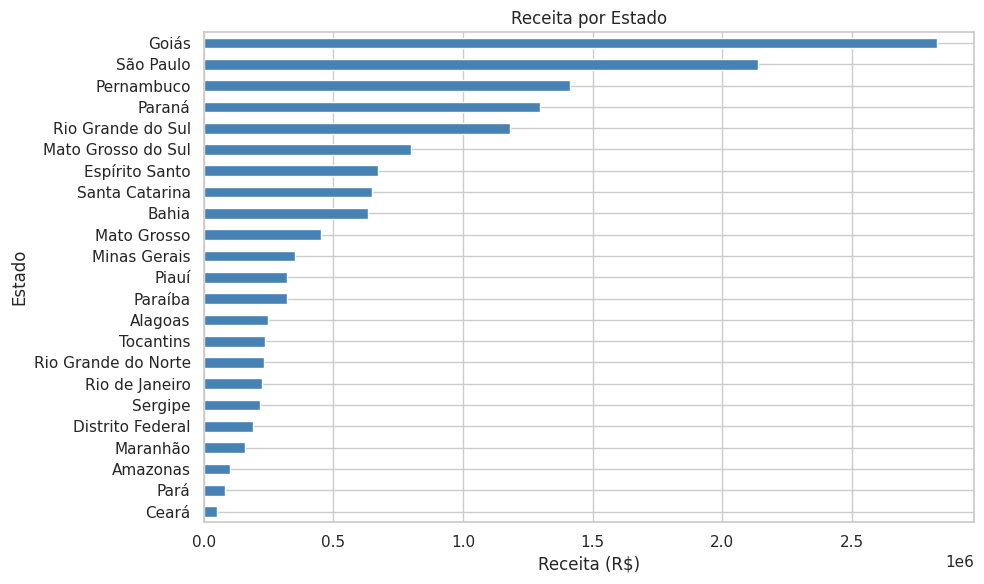

In [33]:
def receita_por_estado(df: pd.DataFrame):
    receita = df.groupby('Estado')['Receita'].sum().sort_values()
    print("\n📍 Receita por Estado:\n", receita)
    receita.plot(kind='barh', title='Receita por Estado', color='#4682B4')
    plt.xlabel("Receita (R$)")
    plt.tight_layout()
    plt.show()

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
receita_por_estado(df)

# Receita por Categoria


📦 Receita por Categoria:
 Categoria do Produto
Material de Escritório    3716666.590
Mobiliário                5125346.852
Tecnologia                5965756.342
Name: Receita, dtype: float64


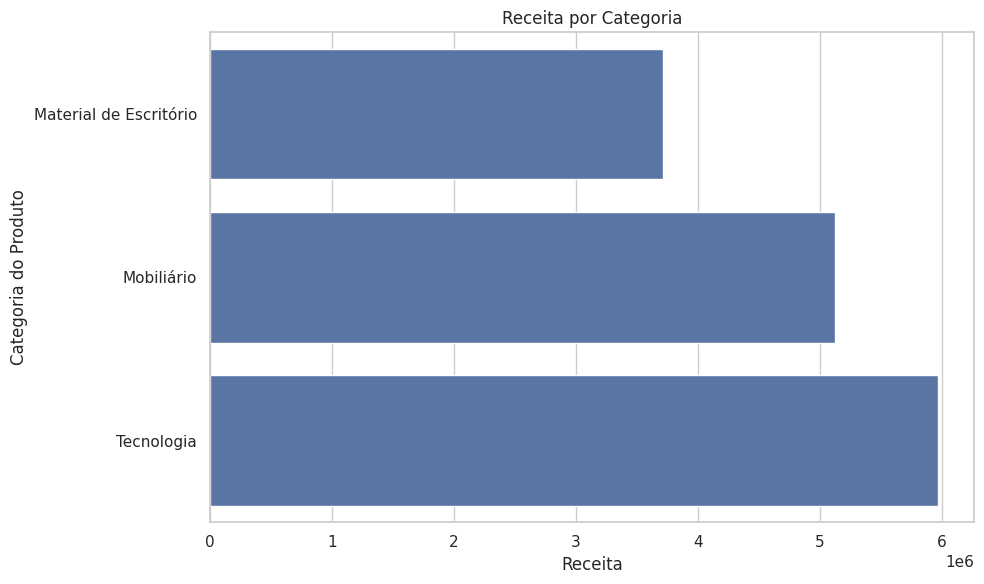

In [34]:
def receita_por_categoria(df: pd.DataFrame):
    receita = df.groupby('Categoria do Produto')['Receita'].sum().sort_values()
    print("\n📦 Receita por Categoria:\n", receita)
    sns.barplot(x=receita.values, y=receita.index)
    plt.title("Receita por Categoria")
    plt.xlabel("Receita")
    plt.tight_layout()
    plt.show()

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
receita_por_categoria(df)

# Receita Mensal

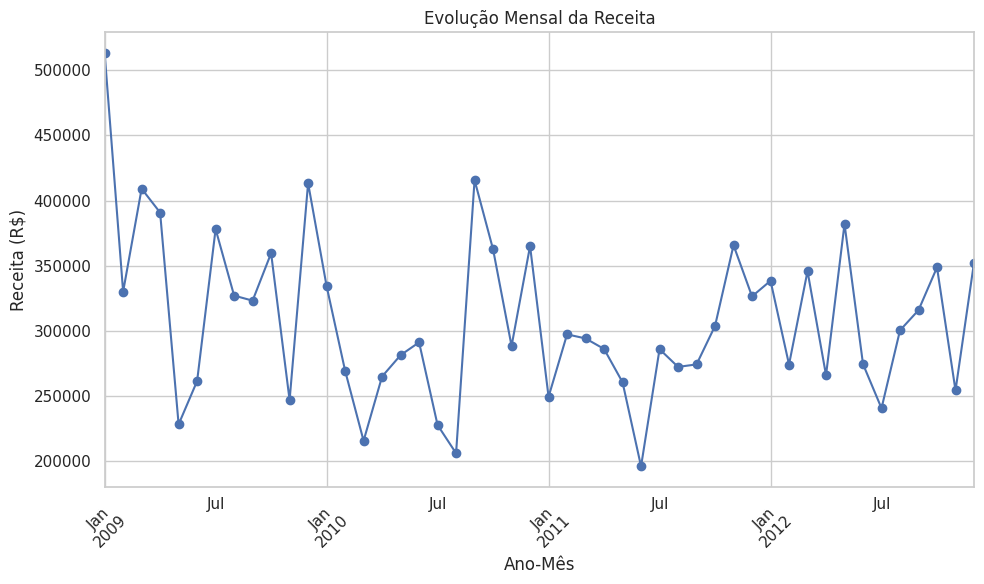

In [35]:
def receita_mensal(df: pd.DataFrame):
    receita_mensal = df.groupby('AnoMes')['Receita'].sum()
    receita_mensal.plot(marker='o')
    plt.title("Evolução Mensal da Receita")
    plt.xlabel("Ano-Mês")
    plt.ylabel("Receita (R$)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
receita_mensal(df)

# Produto Mais Vendido



🛒 Produtos Mais Vendidos:
 Nome do Produto
Global High-Back Leather Tilter, Burgundy                            666
Bevis 36 x 72 Conference Tables                                      619
Wilson Jones Hanging View Binder, White, 1"                          585
Global Troy™ Executive Leather Low-Back Tilter                       550
Memorex 4.7GB DVD+RW, 3/Pack                                         546
80 Minute CD-R Spindle, 100/Pack - Staples                           546
Bell Sonecor JB700 Caller ID                                         537
Master Giant Foot® Doorstop, Safety Yellow                           529
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables    516
#10- 4 1/8" x 9 1/2" Recycled Envelopes                              504
Name: Quantidade, dtype: int64


<ipython-input-36-44c626543b33>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


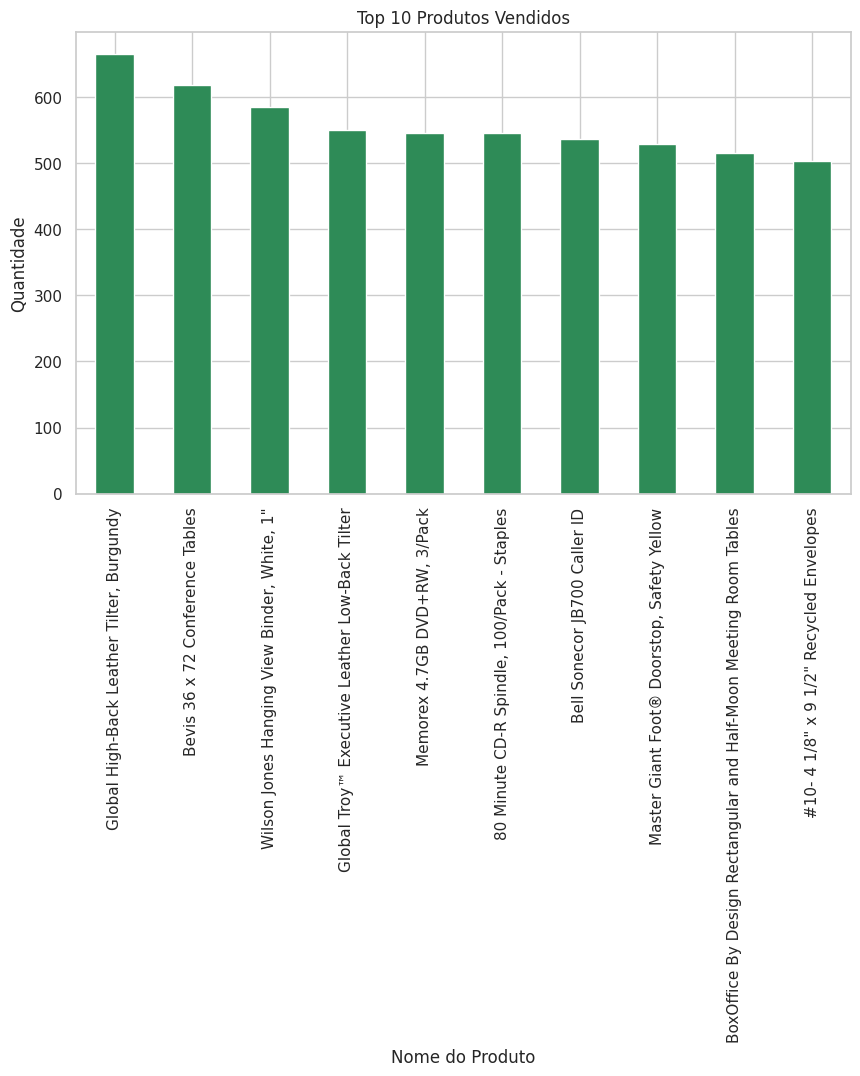

In [36]:
def produto_mais_vendido(df: pd.DataFrame):
    produtos = df.groupby('Nome do Produto')['Quantidade'].sum().sort_values(ascending=False)
    print("\n🛒 Produtos Mais Vendidos:\n", produtos.head(10))
    produtos.head(10).plot(kind='bar', title='Top 10 Produtos Vendidos', color='#2E8B57')
    plt.ylabel("Quantidade")
    plt.tight_layout()
    plt.show()

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
produto_mais_vendido(df)

# Receita por Cliente

In [37]:
def receita_por_cliente(df: pd.DataFrame):
    vendedores = df.groupby('Nome do Cliente')['Receita'].sum().sort_values()
    print("\n👔 Receita por cliente:\n", vendedores)

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
receita_por_cliente(df)


👔 Receita por cliente:
 Nome do Cliente
Jeremy Farry             83.6700
Natalie DeCherney       122.8600
Nicole Fjeld            140.7200
Katrina Edelman         169.7400
Dorothy Dickinson       197.1400
                        ...     
Grant Carroll         88128.7625
Sylvia Foulston       88269.6675
Roy Skaria            92075.2130
Deborah Brumfield     97103.5455
Emily Phan           116954.2780
Name: Receita, Length: 795, dtype: float64


# Correlação: Desconto x Receita

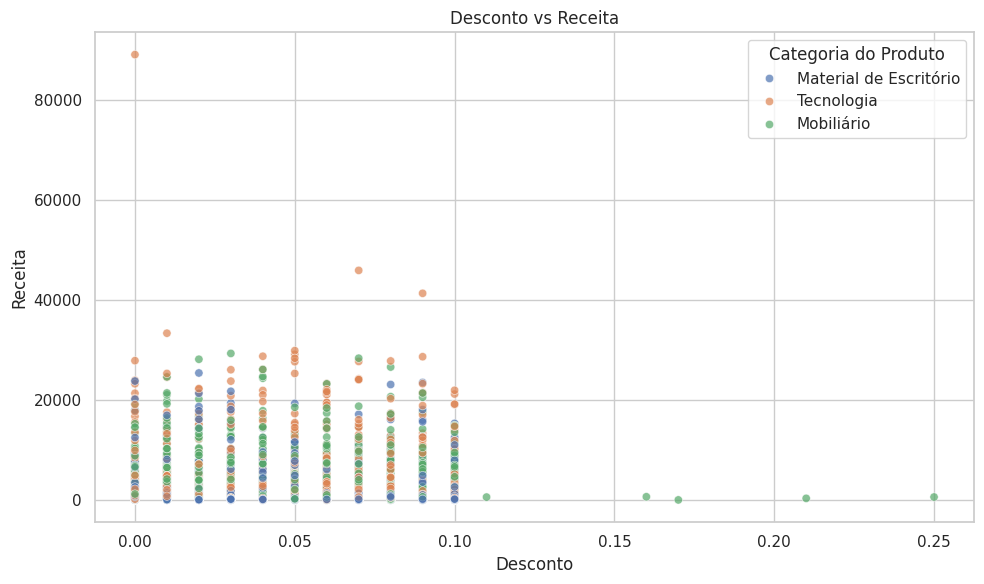

In [38]:
def correlacao_desconto_receita(df: pd.DataFrame):
    sns.scatterplot(data=df, x='Desconto', y='Receita', hue='Categoria do Produto', alpha=0.7)
    plt.title("Desconto vs Receita")
    plt.tight_layout()
    plt.show()

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
correlacao_desconto_receita(df)

# Boxplot: Receita por Segmento e Categoria

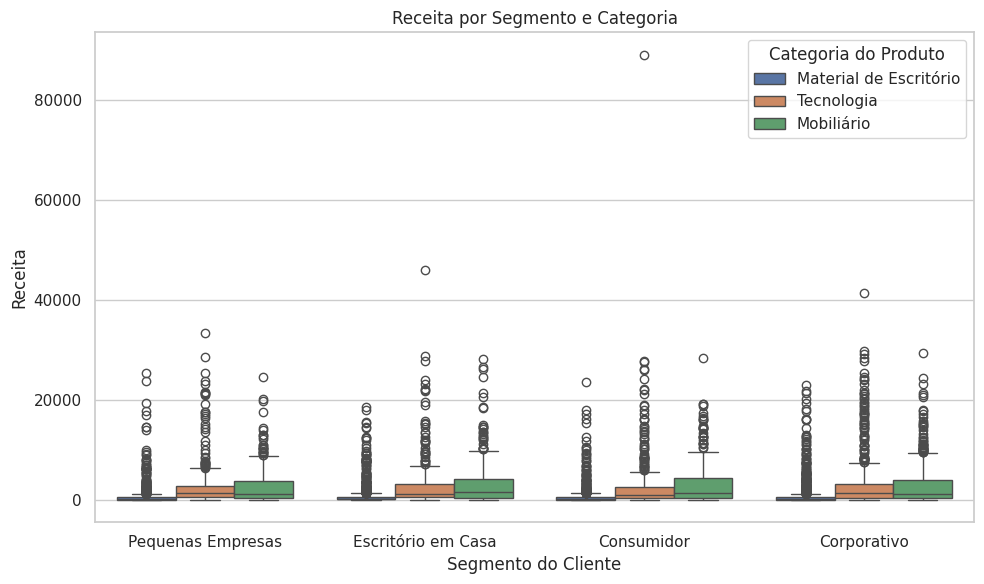

In [39]:
def boxplot_receita_segmento_categoria(df: pd.DataFrame):
    sns.boxplot(data=df, x='Segmento do Cliente', y='Receita', hue='Categoria do Produto')
    plt.title("Receita por Segmento e Categoria")
    plt.tight_layout()
    plt.show()

df = carregar_dados('/content/Cópia de Base de Vendas Varejo.xlsx')
boxplot_receita_segmento_categoria(df)